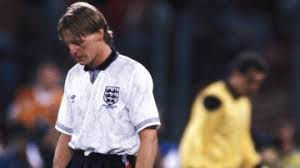

# Intro to Data Analysis in Python using Pandas & Friends

#### Learning Objectives
- Use the Pandas package to read and explore the dataset
- Perform simple Pandas operations on the dataset
- Visualise the data using Matplotlib and Seaborn packages

#### Dataset
This dataset consist of data World Cup Penalty Shootouts since 1990

<b>date</b>  - the date of the shootout <br>
<b>home_team</b>  - the home team in the shootout <br>
<b>away_team</b>  - the away team in the shootout<br>
<b>winner</b>  - the winner of the shootout<br>
<b>first_shooter</b>  - the team that took the first penalty<br>
<b>tournament</b>  - the tournament<br>

## 1. Basic Data Exploration and Pandas Operations

#### Exercise 1: Load and Inspect the Data

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
# Load the dataset
shootouts_df = pd.read_csv('shootouts.csv')

# Display the first few rows of the dataset
shootouts_df.head()

,date,home_team,away_team,winner,first_shooter,tournament
0,1990-06-25,Republic of Ireland,Romania,Republic of Ireland,Romania,FIFA World Cup
1,1990-06-30,Yugoslavia,Argentina,Argentina,Argentina,FIFA World Cup
2,1990-07-03,Italy,Argentina,Argentina,Italy,FIFA World Cup
3,1990-07-04,Germany,England,Germany,England,FIFA World Cup
4,1992-06-22,Netherlands,Denmark,Denmark,Netherlands,UEFA Euro


In [18]:
# Display the last few rows of the dataset
shootouts_df.tail()

,date,home_team,away_team,winner,first_shooter,tournament
45,2022-12-05,Japan,Croatia,Croatia,Japan,FIFA World Cup
46,2022-12-06,Morocco,Spain,Morocco,Morocco,FIFA World Cup
47,2022-12-09,Croatia,Brazil,Croatia,Croatia,FIFA World Cup
48,2022-12-09,Netherlands,Argentina,Argentina,Netherlands,FIFA World Cup
49,2022-12-18,Argentina,France,Argentina,France,FIFA World Cup


In [19]:
# Print some basic info about the dataset
shootouts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           50 non-null     object
 1   home_team      50 non-null     object
 2   away_team      50 non-null     object
 3   winner         50 non-null     object
 4   first_shooter  50 non-null     object
 5   tournament     50 non-null     object
dtypes: object(6)
memory usage: 2.5+ KB


#### Exercise 2: Is there an advantage to taking the first penalty?

In [22]:
# First shooter wins - find the shape of the data and assign it to a variable
first_wins = shootouts_df[shootouts_df['first_shooter'] == shootouts_df['winner']].shape[0]
first_wins

26

In [23]:
# Second shooter wins - find the shape of the data and assign it to a variable
second_wins = shootouts_df[shootouts_df['first_shooter'] != shootouts_df['winner']].shape[0]
second_wins

24

In [24]:
# Total shootouts
total_shootouts = shootouts_df.shape[0]
total_shootouts

50

In [25]:
# Calculate win rates
win_rate_first_shooter = first_wins / total_shootouts
win_rate_second_shooter = second_wins / total_shootouts

# Display the win rates
print(f"Win rate for the first shooter: {win_rate_first_shooter:.2%}")
print(f"Win rate for the second shooter: {win_rate_second_shooter:.2%}")

Win rate for the first shooter: 52.00%
Win rate for the second shooter: 48.00%


Yes, there appears to be an advantage unless you are England.

#### Exercise 3: Who has the best record in shootouts?

In [27]:
# Calculate the total number of shootouts each team participated in
home_shootouts = shootouts_df['home_team'].value_counts()
away_shootouts = shootouts_df['away_team'].value_counts()

In [34]:
# Combine both home and away shootouts for total shootouts per team
total_shootouts = home_shootouts.add(away_shootouts, fill_value=0).astype(int)
total_shootouts.head()

Argentina    7
Brazil       4
Bulgaria     1
Chile        1
Colombia     1
Name: count, dtype: int64

In [32]:
# Calculate the number of wins for each team
win_counts = shootouts_df['winner'].value_counts()
win_counts.head()

winner
Argentina    6
Italy        5
Germany      4
Spain        4
Croatia      4
Name: count, dtype: int64

In [35]:
# Combine both total shootouts and win counts into a DataFrame
records = pd.DataFrame({
    'total_shootouts': total_shootouts,
    'wins': win_counts
}).fillna(0)  # Fill NaN values with 0

# Calculate the win rate for each team
records['win_rate'] = records['wins'] / records['total_shootouts']

In [36]:
# Filter the dataset to teams that have been in at least 4 shootouts, sorted by win rate
records[records['total_shootouts']>3].sort_values('win_rate', ascending=False) 

,total_shootouts,wins,win_rate
Germany,4,4.0,1.000000
Argentina,7,6.0,0.857143
Croatia,5,4.0,0.800000
Brazil,4,3.0,0.750000
Portugal,4,3.0,0.750000
Italy,10,5.0,0.500000
Spain,9,4.0,0.444444
France,6,2.0,0.333333
Netherlands,8,2.0,0.250000
Switzerland,4,1.0,0.250000


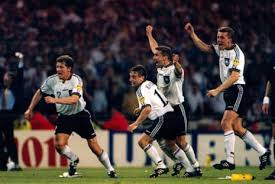

### More Penalties

### Dataset

<b>Game_id</b> - The Game Id. <br>
<b>Team</b> - Kicking Team. <br>
<b>Zone</b> - Where the shot was taken. To do this, I divided the goal in 9 different zones. <br>
<b>Foot</b> - Whether the shooter was left or right footed. <br>
<b>Keeper</b> - Where did the keeper dive. <br>
<b>OnTarget</b> - Whether the shot was on target or not. <br>
<b>Goal</b> - Whether the shot went in or not. <br>
<b>Penalty_Number</b> - The penalty number in each series. <br>
<b>Elimination</b> - Whether or not the penalty was for elimination. This where the cases when, if the shot went in, the Game was over or the cases where a miss would end the game.

In the <b>Zone</b> column, the goal is divided into 9 different sections looking at it from the front:

1. Upper left corner
2. Upper center
3. Upper right corner
4. Middle left area
5. Middle center area
6. Middle right area
7. Bottom left corner
8. Bottom center zone
9. Bottom right corner


In [41]:
df = pd.read_csv('WorldCupShootouts.csv')
df.head()

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0


In [39]:
# Some null values, lets drop them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game_id         354 non-null    int64  
 1   Team            354 non-null    object 
 2   Zone            320 non-null    float64
 3   Foot            320 non-null    object 
 4   Keeper          320 non-null    object 
 5   OnTarget        320 non-null    float64
 6   Goal            320 non-null    float64
 7   Penalty_Number  354 non-null    int64  
 8   Elimination     321 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.0+ KB


In [42]:
print(df.shape)

(354, 9)


In [43]:
df = df.dropna()
print(df.shape)

(320, 9)


In [47]:
# Define the goal layout
goal_layout = {
    1: (0, 0), 2: (0, 1), 3: (0, 2),
    4: (1, 0), 5: (1, 1), 6: (1, 2),
    7: (2, 0), 8: (2, 1), 9: (2, 2)
}

# Initialize heatmap grids
heatmap_zones = np.zeros((3, 3))
heatmap_goals = np.zeros((3, 3))
heatmap_keeper_L = np.zeros((3, 3))
heatmap_keeper_C = np.zeros((3, 3))
heatmap_keeper_R = np.zeros((3, 3))

In [55]:
# Aggregate data
for zone in range(1, 10):
    zone_data = df[df['Zone'] == zone]
    row, col = goal_layout[zone]
    heatmap_zones[row, col] = len(zone_data)
    heatmap_goals[row, col] = zone_data['Goal'].sum()

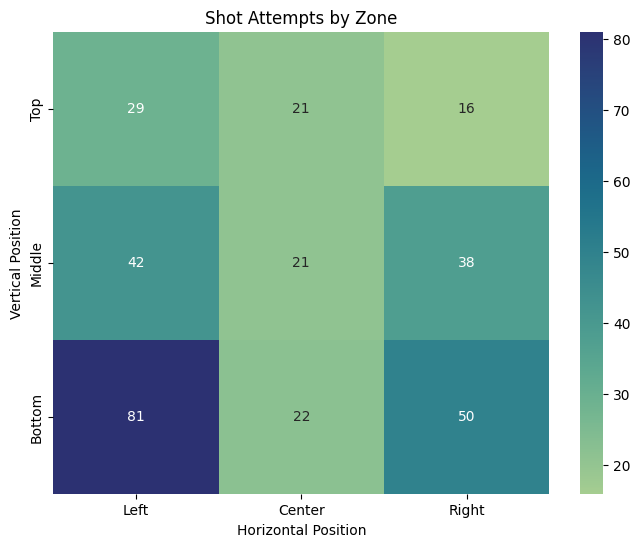

In [74]:
# Calculate shots zone
zone_shots_heatmap = df.groupby('Zone').size().reset_index()

# Convert zone_shots_heatmap into a 3x3 matrix for heatmap
heatmap_data = zone_shots_heatmap.set_index('Zone').values.reshape(3, 3)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='crest', xticklabels=['Left', 'Center', 'Right'], yticklabels=['Top', 'Middle', 'Bottom'])
plt.title('Shot Attempts by Zone')
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.show()

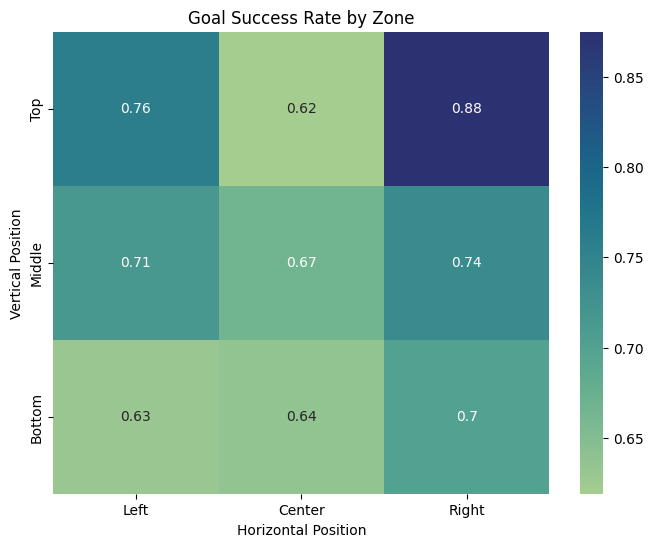

In [62]:
# Calculate success rate by zone
zone_success_heatmap = df.groupby('Zone')['Goal'].mean().reset_index()

# Convert zone_success into a 3x3 matrix for heatmap
heatmap_data = zone_success_heatmap.set_index('Zone').values.reshape(3, 3)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='crest', xticklabels=['Left', 'Center', 'Right'], yticklabels=['Top', 'Middle', 'Bottom'])
plt.title('Goal Success Rate by Zone')
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.show()

In [80]:
# Calculate miss rate (1 - Goal) for each Penalty_Number, and just take the first 10 penalities of the shootout
miss_rates = df.groupby('Penalty_Number')['Goal'].apply(lambda x: 1 - x.mean()).reset_index()[:-2]

# Rename columns for clarity
miss_rates.columns = ['Penalty_Number', 'Miss_Rate']

# Display the miss rates
print(miss_rates)

   Penalty_Number  Miss_Rate
0               1   0.285714
1               2   0.257143
2               3   0.314286
3               4   0.257143
4               5   0.285714
5               6   0.314286
6               7   0.314286
7               8   0.406250
8               9   0.360000
9              10   0.285714


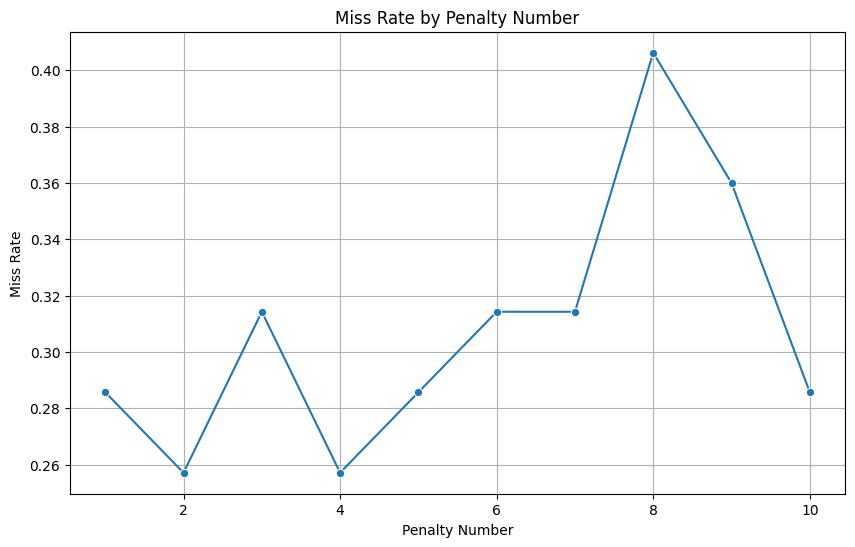

In [81]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=miss_rates, x='Penalty_Number', y='Miss_Rate', marker='o')
plt.title('Miss Rate by Penalty Number')
plt.xlabel('Penalty Number')
plt.ylabel('Miss Rate')
plt.grid(True)
plt.show()